# Multivariate normal distribution

![normal](./_static/normal.gif)

The [multivariate normal distribution](https://en.wikipedia.org/wiki/Multivariate_normal_distribution) is a generalization of the univariate normal distribution, 
commonly known as the Gaussian distribution. We will be taking a look at the bivariate case. 
Here, we have two variables X and Y that are bivariately normally distributed: 

$$
\begin{pmatrix}
 X \\
 Y
\end{pmatrix}  \sim N \left( \begin{pmatrix}
 \mu_X \\
 \mu_Y
\end{pmatrix} , \begin{pmatrix}
 \sigma^2_X &  \rho \sigma_X \sigma_Y \\
 \rho \sigma_X \sigma_Y &  \sigma^2_Y
\end{pmatrix} \right)
$$
where $ \mu_X, \mu_Y $ are the means of the respective variable,
$ \sigma^2_X, \sigma^2_Y$ are the variances on the diagonal of the covariance 
matrix and $\rho$ is the correlation coefficient between X and Y. 
On the off-diagonal, we can find the covariance of X and Y.
Since

$$ 
\rho_{X,Y} = \frac{{cov}(X,Y)}{\sigma_X \sigma_Y}
$$

we can write the covariance as 

$$
cov(X,Y) = \rho_{X,Y} \sigma_X \sigma_Y
$$

For creating the interactive widget, we will use `matplot.widgets`. 
We will use `scipy.stats.multivariate_normal` to compute the probability density function of the bivariate normal 
distribution.

In [1]:
%matplotlib widget
import ipywidgets as widgets
import matplotlib as mpl 
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button
import numpy as np

from scipy.stats import multivariate_normal 
from matplotlib import cm

default_color = "#81b69d80"

In the widget, only $ \mu_x, \mu_Y $ and  $ \rho_{X,Y}$ are adjustable. The variances $\sigma^2_X$ and $\sigma^2_Y$ are 
arbitrarily set to 2 and can be changed in the code. The covariance is computed based on the correlation coeefficient.
If you want to try out the widget interactively, you can find the notebook file [here](https://github.com/brittaao/study-sandbox/blob/main/prob-distributions/normal-distribution.ipynb).

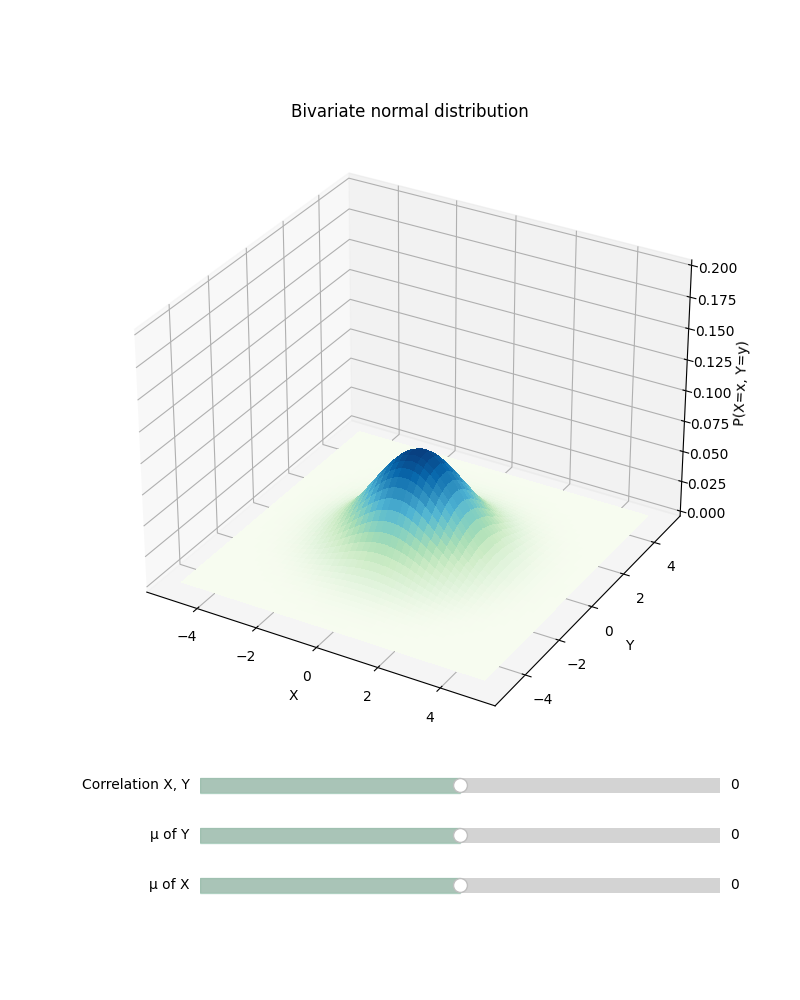

In [2]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(8, 10))

fig.subplots_adjust(bottom=0.25)
ax_x_slider = fig.add_axes([0.25, 0.1, 0.65, 0.03])
ax_y_slider = fig.add_axes([0.25, 0.15, 0.65, 0.03])
ax_corr_slider = fig.add_axes([0.25, 0.2, 0.65, 0.03])

x_mean, y_mean = 0, 0
variance_x, variance_y, correlation_xy = 2, 2, 0

# Creat three sliders for means on x- and y-axis as well as correlation 
x_slider = Slider(
    ax = ax_x_slider,
    label="μ of X",
    valmin=-5,
    valmax=5,
    valinit=x_mean,
    valstep = np.arange(-5, 5, 0.5),
    color=default_color)

y_slider = Slider(
    ax= ax_y_slider,
    label="μ of Y",
    valmin=-5,
    valmax=5,
    valinit= y_mean,
    valstep = np.arange(-5, 5, 0.5),
    color= default_color)

corr_slider = Slider(
    ax = ax_corr_slider,
    label= "Correlation X, Y",
    valmin=-1,
    valmax=1,
    valinit= 0,
    valstep = np.arange(-1, 1, 0.2),
    color=default_color)

x, y = np.mgrid[-5:5:.005, -5:5:.005]
pos = np.dstack((x, y))


# Replot the distribution using slider values
def update_dist(val):
    ax.cla()
    y_mean = y_slider.val
    x_mean = x_slider.val
    correlation_xy = corr_slider.val
    covariance = correlation_xy*np.sqrt(variance_x)*np.sqrt(variance_y)
    rv = multivariate_normal(
        [x_mean, y_mean], 
        [[variance_x, covariance], [covariance, variance_y]], 
        allow_singular=True)
    ax.set_zlim(0, 0.2)
    surf = ax.plot_surface(x, y, rv.pdf(pos), cmap=mpl.colormaps['GnBu'],
                       linewidth=0, antialiased=False)
    
    ax.set_ylabel('Y')
    ax.set_xlabel('X')
    ax.set_zlabel('P(X=x, Y=y)')
    ax.set_title('Bivariate normal distribution')
    fig.canvas.draw_idle()

# Register the update function with each slider
x_slider.on_changed(update_dist)
y_slider.on_changed(update_dist)
corr_slider.on_changed(update_dist)

# Set plot title and plot inital plot
update_dist(0)

plt.show()

```{note}
The output in this jupyter book will unfortunately not be interactive. This is because the widgets require 
a running python kernel, but jupyter books renders markdown and .ipynb files into html (so no Python 
kernel running).
```